In [ ]:
import pandas as pd
import numpy as np

import os
working_directory = os.getcwd()
print(working_directory)

import warnings
warnings.filterwarnings('ignore')

/content


In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd '/content/drive/MyDrive/project'

/content/drive/MyDrive/project


In [ ]:
!pip3 install pickle5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 132 kB 37.7 MB/s 
  Created wheel for pickle5: filename=pickle5-0.0.11-cp38-cp38-linux_x86_64.whl size=236291 sha256=7c13af806e855b60e8007bada6cc47e327d4d02c16acd5999a84c8c5250be1ec
  Stored in directory: /root/.cache/pip/wheels/25/d4/61/dbd8edd1a0d656be7b4267c85db3b61951eb60016a0154a122
Successfully built pickle5


Text Analysis:

When a machine analyses text, it finds key information inside the text itself. However, when it conducts text analytics, it finds patterns across hundreds of texts and produces graphs, reports, etc.



In [ ]:
import pickle
import pickle5 as pickle


with open('df_train.pkl', 'rb') as f:
    df_train = pickle.load(f)

with open('df_test.pkl', 'rb') as f:
    df_test = pickle.load(f)

with open('df_validation.pkl', 'rb') as f:
    df_validation = pickle.load(f)

In [ ]:
df_train

,body,clean_title,2_way_label
0,Someone clearly works at a deliJudging by the ...,gossiping swiss cheese,0
1,Isnt that a miter gauge Yep I dont believe Ive...,my friend called it the vice that looks like a...,0
2,The shadows on the wall make it look like he h...,my mop head was offended when i went to replac...,0
3,The thumbnail looks like a guy blowing an infl...,protect the homeland buy defense bonds switzer...,0
4,all i see is bacon Should have captioned it He...,nice kitty via zoomingjapancom,0
...,...,...,...
55885,Eau de Terrier Only thing that came into my mind,X-post from r/funny: SPCA Ad with a Terrier Vo...,1
55886,I Love this Movie wear a vest Donnie,the real donnie brasco is coming to montreal t...,1
55887,Incredible Cant find any other words at the m...,caines arcade part one of the most inspiration...,1
55888,precioussss Whatre you doing up there Mr Jingles,selfish cat is stealin your toes,1


The scikit-learn package CountVectorizer employs count vectorization to turn a group of text documents into a matrix of token counts. 

1. Fit the model to a column of data in step one. The data will be tokenized by CountVectorizer and divided into units called n-grams, the length of which can be specified by giving a tuple to the ngram range argument. 
2. set the argument stop words='English,' this will automatically remove stop words. 
3. Set the ngram range to preferred length will result in the vocabulary expanding from single words to short sentences.

In [ ]:
# Unigrams and bigrams
from sklearn.feature_extraction.text import CountVectorizer


def get_n_words(text, n=None):
    vect = CountVectorizer().fit(text)
    bag_of_words = vect.transform(text)
    sum = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum[0, idx]) for word, idx in vect.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

Stopword Removal 

Eliminate terms that offer little or very little semantic information in order to deliver a more accurate automated analysis of the text. A, and, or, the, and other similar terms are also referred to as stopwords.

In [ ]:
# Import stopwords with nltk.
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
stop = stopwords.words('english')

# Exclude stopwords

df_train['body'] = df_train['body'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

df_train['clean_title'] = df_train['clean_title'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df_validation['body'] = df_validation['body'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

df_validation['clean_title'] = df_validation['clean_title'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))


In [ ]:
df_test['body'] = df_test['body'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

df_test['clean_title'] = df_test['clean_title'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))


Extraction of keywords 


The most common and pertinent terms inside a text are its keywords, which are words and phrases that sum up the document's contents.

In [ ]:
import seaborn as sns

def plot_words(df):

  # compute common words using get_n_words
  common_words = get_n_words(df['body'], 20)
  data = pd.DataFrame (common_words,columns=['word','count'])

  #plot the first 20 common words
  sns.barplot(x='count', y="word", data=data)


common words in train data


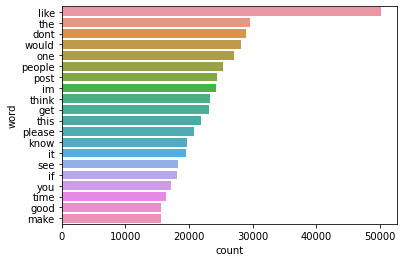

In [ ]:
#common words plot for train data

print("common words in train data") 
plot_words(df_train)

common words in validation data


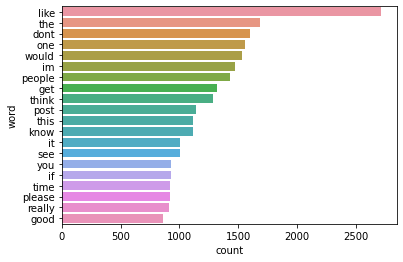

In [ ]:
# common words plot for validation data

print("common words in validation data") 
plot_words(df_validation)

common words in test data


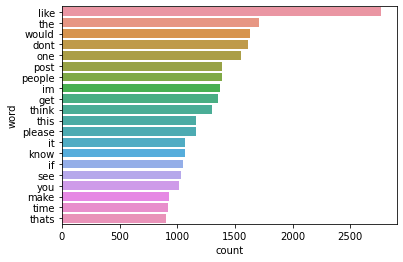

In [ ]:
# common words plot for validation data

print("common words in test data") 
plot_words(df_test)

0    33262
1    22628
Name: 2_way_label, dtype: int64


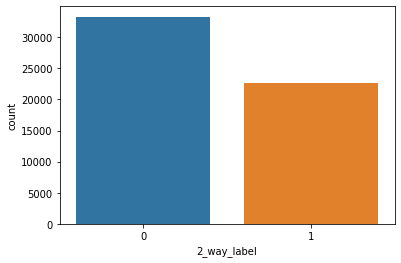

In [ ]:
# Target distribution for training dataset

print(df_train['2_way_label'].value_counts())

sns.countplot(x=df_train['2_way_label'])

0    1925
1     983
Name: 2_way_label, dtype: int64


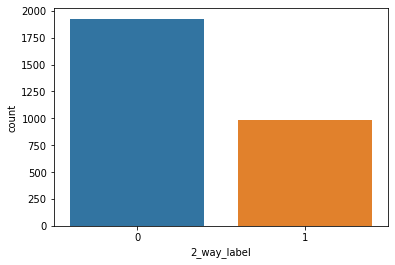

In [ ]:
# Target distribution for Validation dataset

print(df_validation['2_way_label'].value_counts())

sns.countplot(x=df_validation['2_way_label'])

0    1971
1    1233
Name: 2_way_label, dtype: int64


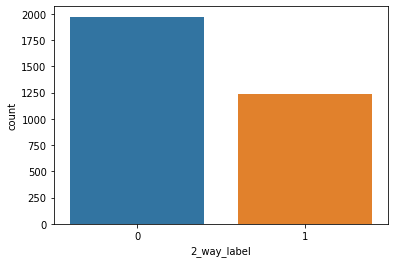

In [ ]:
# Target distribution for training dataset

print(df_test['2_way_label'].value_counts())

sns.countplot(x=df_test['2_way_label'])

word cloud 

A word cloud, also known as a tag cloud, is a graphic representation of text data in the form of tags. These tags are usually single words, and the size and colour of the words indicate how important they are. 

Analyzing the text and obtaining the frequency of each word inside the text is the first stage in presenting data as a Word Cloud.

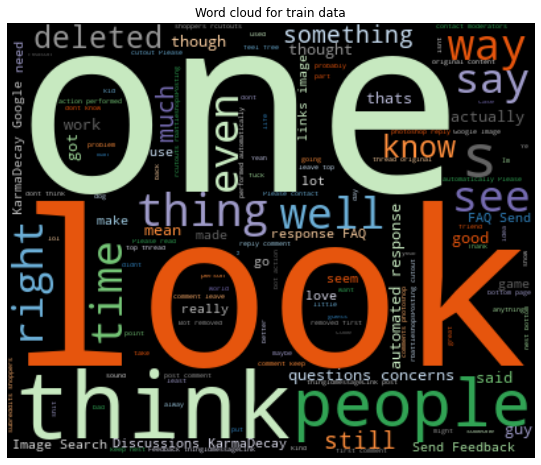

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


word_cloud = WordCloud(max_words=200,
               random_state=42, width=400, height=330, colormap='tab20c', collocations = True)
word_cloud.generate(' '.join(df_train['body']))
plt.figure(figsize=(10,8))
plt.imshow(word_cloud, interpolation="bilinear")
plt.axis('off')
plt.title('Word cloud for train data')
plt.show()